In [1]:
# Import libs
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import re

In [2]:
URLS = [f'https://www.ecb.europa.eu/press/pr/date/{year}/html/index_include.en.html' for year in range(1997, 2023)]
HEADERS = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

In [3]:
corpus = pd.DataFrame()

In [4]:
for URL in URLS:
    html = requests.get(URL, headers=HEADERS).text
    soup = BeautifulSoup(html, 'lxml')

    try:
        news_item_dates = soup.find_all('dt', attrs={'isodate': re.compile('\d{4}-\d{2}-\d{2}')})
    except TypeError:
        pass

    for date in news_item_dates:
        news_item_content = date.find_next_sibling('dd')
        news_item_category = news_item_content.find('div', class_='category')
        news_item_title = news_item_content.find('div', class_='title')
        news_item_link = f"https://www.ecb.europa.eu{news_item_content.find('a')['href']}"
        news_item_langs = news_item_content.find_all('span', class_='ecb-full')
        item_html = requests.get(news_item_link, headers=HEADERS).text
        item_soup = BeautifulSoup(item_html, 'lxml')

        try:
            news_item_text = item_soup.find('main').findAll('div', class_='section')
        except AttributeError:
            news_item_text = ''

        news_item_df = pd.DataFrame({
            'date': date['isodate'], 
            'category': news_item_category.text,
            'title': news_item_title.text,
            'link': news_item_link,
            'langs': ', '.join(set([lang.text for lang in news_item_langs])),
            'text': ' '.join([text.text for text in news_item_text]).strip()
        }, index=[2])
        corpus = pd.concat([corpus, news_item_df], axis=0, ignore_index=True)

corpus.head()

,date,category,title,link,langs,text
0,1997-12-29,PRESS RELEASE,Addendum to the provisional list of monetary f...,https://www.ecb.europa.eu/press/pr/date/1997/h...,English,In accordance with the Implementation Package ...
1,1997-11-17,PRESS RELEASE,The date for the introduction of the euro bank...,https://www.ecb.europa.eu/press/pr/date/1997/h...,English,"At its meeting of 4 November 1997, the Council..."
2,1997-10-27,PRESS RELEASE,Publication of the EMI's up-date on legal conv...,https://www.ecb.europa.eu/press/pr/date/1997/h...,English,The Treaty establishing the European Community...
3,1997-09-24,PRESS RELEASE,Publication of an information brochure by the ...,https://www.ecb.europa.eu/press/pr/date/1997/h...,English,The European Monetary Institute (EMI) will tod...
4,1997-09-23,PRESS RELEASE,The single monetary policy in Stage Three: Gen...,https://www.ecb.europa.eu/press/pr/date/1997/h...,English,The European Monetary Institute (EMI) is today...


In [8]:
corpus.shape

(2572, 6)

In [9]:
corpus.isnull().sum()

date        0
category    0
title       0
link        0
langs       0
text        0
dtype: int64

In [10]:
corpus['words'] = corpus['text'].apply(lambda x: len(x.split()))
corpus.sample(15)

,date,category,title,link,langs,text,words
1355,2011-11-16,PRESS RELEASE,"Statement by the EC, ECB and IMF on the second...",https://www.ecb.europa.eu/press/pr/date/2011/h...,English,"Staff teams from the European Commission (EC),...",761
2541,2022-04-14,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",14 April 2022Russia’s aggression in Ukraine is...,899
2395,2020-05-04,PRESS RELEASE,Results of the Q2 2020 ECB Survey of Professio...,https://www.ecb.europa.eu/press/pr/date/2020/h...,English,Expected effects of the coronavirus (COVID-19)...,423
788,2006-09-29,OTHER PUBLICATION,Indicators of financial integration in the eur...,https://www.ecb.europa.eu/pub/pdf/other/indica...,English,,0
510,2003-03-10,PRESS RELEASE,Memorandum of Understanding on the exchange of...,https://www.ecb.europa.eu/press/pr/date/2003/h...,English,The European Central Bank (ECB) is today publi...,253
2416,2020-03-12,PRESS RELEASE,ECB announces easing of conditions for targete...,https://www.ecb.europa.eu/press/pr/date/2020/h...,English,More favourable operations to support bank len...,701
1061,2008-06-03,PRESS RELEASE,Common roots - diversity of voices. Europe Cul...,https://www.ecb.europa.eu/press/pr/date/2008/h...,English,In order to mark the tenth anniversary of the ...,325
96,1999-10-07,PRESS RELEASE,Decision of the European Central Bank on fraud...,https://www.ecb.europa.eu/press/pr/date/1999/h...,English,The European Central Bank (ECB) shares the con...,194
26,1998-12-08,PRESS RELEASE,Visit by the Spanish Prime Minister,https://www.ecb.europa.eu/press/pr/date/1998/h...,English,"The Spanish Prime Minister, Mr. José María Azn...",72
918,2007-06-22,PRESS RELEASE,Fourth Progress Report on TARGET2,https://www.ecb.europa.eu/press/pr/date/2007/h...,English,The fourth progress report on TARGET2 publishe...,160


In [13]:
print('Total words:', f"{corpus['words'].values.sum():,}")
print('Avg word length:', round(corpus['words'].values.mean(), 1))

Total words: 1,289,410
Avg word length: 501.3


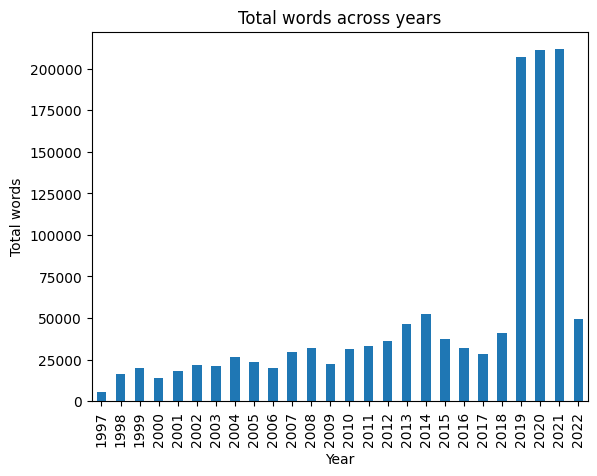

In [18]:
# Plot word length across years
corpus['year'] = corpus['date'].apply(lambda x: int(x.split('-')[0]))
corpus.groupby('year')['words'].sum().plot(kind='bar')
plt.title('Total words across years')
plt.xlabel('Year')
plt.ylabel('Total words')
plt.show()

In [32]:
# Move year column to first place
year_col = corpus.pop('year')
corpus.insert(0, 'year', year_col)
corpus.sample(10)

,year,date,category,title,link,langs,text,words
862,2007,2007-12-03,PRESS RELEASE,The ECB's gold sales,https://www.ecb.europa.eu/press/pr/date/2007/h...,English,"On 30 November 2007, the European Central Bank...",42
225,2000,2000-01-03,PRESS RELEASE,Successful start of business at the ECB on 3 J...,https://www.ecb.europa.eu/press/pr/date/2000/h...,English,Following intensive and successful testing on ...,47
573,2004,2004-07-13,PRESS RELEASE,Statement by the European Central Bank,https://www.ecb.europa.eu/press/pr/date/2004/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...",The European Central Bank (ECB) takes note of ...,117
1832,2014,2014-04-25,PRESS RELEASE,ECB publishes SSM Framework Regulation,https://www.ecb.europa.eu/press/pr/date/2014/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",Framework Regulation lays basis for the work o...,183
1512,2012,2012-08-20,PRESS RELEASE,ECB Charity Initiative,https://www.ecb.europa.eu/press/pr/date/2012/h...,"Português, Slovenščina, Nederlands, Eesti keel...",At the end of 2011 the European Central Bank (...,336
487,2003,2003-05-08,PRESS RELEASE,The ECB's monetary policy strategy,https://www.ecb.europa.eu/press/pr/date/2003/h...,"Português, Dansk, Nederlands, English, Svenska...",After more than four years of conducting monet...,565
819,2006,2006-05-19,PRESS RELEASE,Publication of the Target Annual Report 2005,https://www.ecb.europa.eu/press/pr/date/2006/h...,English,The European Central Bank (ECB) is today publi...,281
1297,2010,2010-05-10,PRESS RELEASE,ECB decides on measures to address severe tens...,https://www.ecb.europa.eu/press/pr/date/2010/h...,English,The Governing Council of the European Central ...,363
1666,2013,2013-06-10,PRESS RELEASE,ECB publishes the indicative calendars for the...,https://www.ecb.europa.eu/press/pr/date/2013/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...",The European Central Bank (ECB) is today publi...,57
2442,2020,2020-01-23,PRESS RELEASE,ECB launches review of its monetary policy str...,https://www.ecb.europa.eu/press/pr/date/2020/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",23 January 2020\n\nReview will encompass quant...,463


In [33]:
# Remove newline character from text column
corpus['text'] = corpus['text'].apply(lambda x: x.replace('\n', ' '))

In [36]:
# Order dataframe by date
corpus = corpus.sort_values(by='date', ascending=False)
corpus.head()

,year,date,category,title,link,langs,text,words
2540,2022,2022-04-15,SURVEY OF PROFESSIONAL FORECASTERS,The ECB Survey of Professional Forecasters - S...,https://www.ecb.europa.eu/stats/ecb_surveys/su...,English,HICP inflation expectations were revised up by...,3250
2539,2022,2022-04-15,PRESS RELEASE,Results of the ECB Survey of Professional Fore...,https://www.ecb.europa.eu/press/pr/date/2022/h...,English,15 April 2022Forecasters cite war in Ukraine a...,458
2541,2022,2022-04-14,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",14 April 2022Russia’s aggression in Ukraine is...,899
2542,2022,2022-04-14,COMBINED MONETARY POLICY DECISIONS AND STATEMENT,Combined monetary policy decisions and statement,https://www.ecb.europa.eu/press/pressconf/shar...,English,,0
2543,2022,2022-04-12,PRESS RELEASE,April 2022 euro area bank lending survey,https://www.ecb.europa.eu/press/pr/date/2022/h...,English,12 April 2022Credit standards tightened for fi...,1090


In [37]:
corpus.to_csv('corpus.csv', sep=';', index=False)